## Práctica 4

In [1]:
# Bibliotecas
from collections import Counter
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 6]
from re import sub
import numpy as np
import string

!pip install elotl
!pip install wordcloud
!pip install nltk
!pip install unidecode
from wordcloud import WordCloud
from elotl import corpus as elotl_corpus
import nltk
nltk.download('brown')
nltk.download('cess_esp')
nltk.download('stopwords')
from nltk.corpus import brown as brown
from nltk.corpus import cess_esp as cess
from nltk.corpus import stopwords
from unidecode import unidecode
axolotl = elotl_corpus.load("axolotl")
tsunkua = elotl_corpus.load("tsunkua")

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


[nltk_data] Downloading package brown to /home/xbmu/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package cess_esp to /home/xbmu/nltk_data...
[nltk_data]   Package cess_esp is already up-to-date!
[nltk_data] Downloading package stopwords to /home/xbmu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# funciones auxiliares
def get_frequencies(vocabulary: Counter, n: int) -> list:
    return [_[1] for _ in vocabulary.most_common(n)]

def plot_frequencies(frequencies: list, title="Freq of words"):
    x = list(range(1, len(frequencies)+1))
    plt.plot(x, frequencies, "-v")
    plt.xlabel("Freq rank (r)")
    plt.ylabel("Freq (f)")
    plt.title(title)


def extract_words_from_sentence(sentence: str) -> list:
    return sub(r'[^\w\s\']', ' ', sentence).lower().split()

def preprocess_corpus(corpus):
    # Obtener la oración de L1,
    # quitar signos de puntuación y
    # obtiene la lista de palabras
    word_list_l1 = []
    word_list_l2 = []
    for row in corpus:
        word_list_l1.extend(extract_words_from_sentence(row[0]))
    # Obtener la oración de L1,
    # quitar signos de puntuación y
    # obtiene la lista de palabras
        word_list_l2.extend(extract_words_from_sentence(row[1]))
    return word_list_l1, word_list_l2


def extract_pos_tags(tagged_lists):
    """
    Extracts POS tags from a list of lists of tagged words.
    
    Args:
        tagged_lists (list of list of tuple): List of lists where each sublist contains (word, POS) tuples.

    Returns:
        list: A list containing the POS tags extracted from each sublist.
    """
    return list(zip(*[[tup[1] for tup in sublist] for sublist in tagged_lists]))[0]

def expand_to_characters(word_list):
    character_list = []

    for sublist in word_list:
        for word in sublist:
            characters = list(word)
            character_list.extend(characters)

    return character_list

def generate_ngrams(word_list, n=2):
    ngram_list = []
    
    for sublist in word_list:
        for word in sublist:
            if len(word) >= n:
                for i in range(len(word) - n + 1):
                    ngram = word[i:i+n]
                    ngram_list.append(ngram)
    
    return ngram_list

def generate_ngrams_simple_list(word_list, n=2):
    ngram_list = []

    for word in word_list:
        if len(word) >= n:
            for i in range(len(word) - n + 1):
                ngram = word[i:i+n]
                ngram_list.append(ngram)
    
    return ngram_list


def normalize_strings(strings):
    normalized_strings = []
    
    for s in strings:
            # Remove accents and convert to lowercase
            normalized_string = unidecode(s).lower()
            normalized_string = ''.join(char for char in normalized_string if char not in string.punctuation)
            if normalized_string != '':
                normalized_strings.append(normalized_string)
    
    return normalized_strings

## 1. Etiquetas POS  

In [3]:
eng_tagged = brown.tagged_sents()
spa_tagged = cess.tagged_sents()

In [4]:
eng_tags = Counter(extract_pos_tags(eng_tagged))
spa_tags = Counter(extract_pos_tags(spa_tagged))

In [5]:
eng_tags.most_common(10)

[('AT', 8297),
 ('PPS', 5935),
 ('IN', 4792),
 ('``', 4168),
 ('RB', 3799),
 ('NP', 3748),
 ('PPSS', 3146),
 ('CC', 2815),
 ('CS', 2189),
 ('DT', 1633)]

In [6]:
spa_tags.most_common(10)

[('sps00', 875),
 ('da0ms0', 768),
 ('rg', 513),
 ('da0fs0', 479),
 ('np0000p', 439),
 ('sn.e-SUJ', 423),
 ('cc', 298),
 ('Fe', 264),
 ('da0mp0', 209),
 ('Fg', 205)]

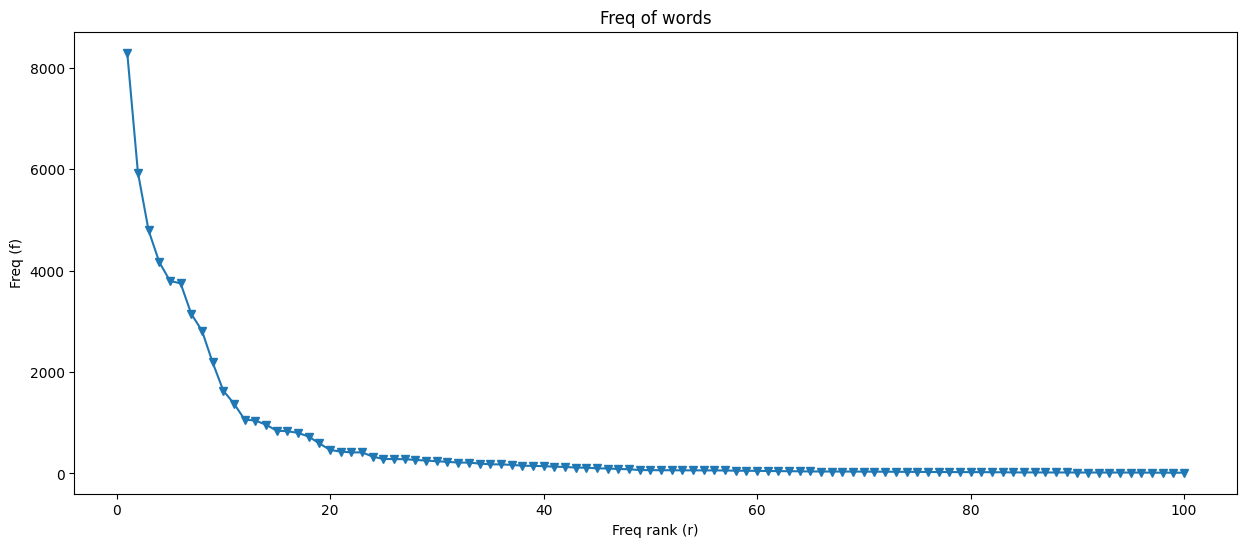

In [7]:
frequencies = get_frequencies(eng_tags, 100)
plot_frequencies(frequencies)

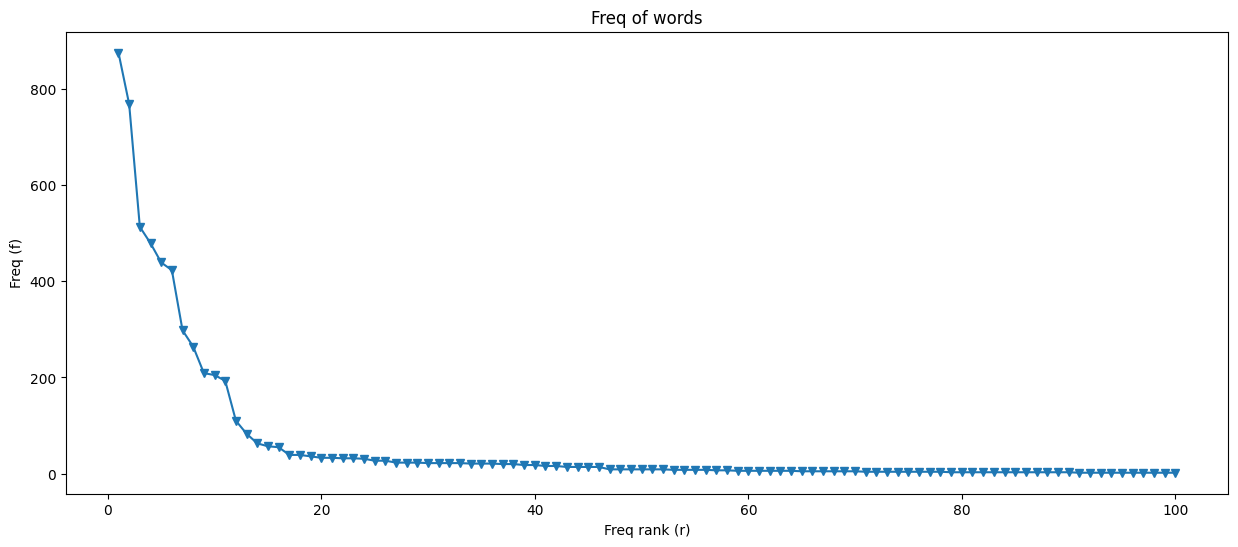

In [8]:
frequencies = get_frequencies(spa_tags, 100)
plot_frequencies(frequencies)

## 2. Caractéres

In [9]:
brown.sents()

[['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.'], ['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.'], ...]

In [10]:
eng_chars = Counter(expand_to_characters(brown.sents()))
spa_chars = Counter(expand_to_characters(cess.sents()))
spanish_words_na, nahuatl_words = preprocess_corpus(axolotl)
spanish_words_oto, otomi_words = preprocess_corpus(tsunkua)
nahuatl_chars = Counter(expand_to_characters(nahuatl_words))
otomi_chars = Counter(expand_to_characters(otomi_words))

In [11]:
nahuatl_chars.most_common(10)

[('a', 240008),
 ('i', 218038),
 ('n', 162612),
 ('t', 149615),
 ('o', 127941),
 ('c', 125389),
 ('l', 122619),
 ('u', 120714),
 ('e', 105715),
 ('h', 94779)]

In [12]:
otomi_chars.most_common(10)

[('a', 34672),
 ('i', 23253),
 ('n', 19120),
 ('t', 14246),
 ('u', 13753),
 ('e', 13705),
 ("'", 13176),
 ('h', 13068),
 ('o', 11874),
 ('m', 9672)]

In [13]:
spa_chars.most_common(10)

[('e', 107336),
 ('a', 99691),
 ('o', 71002),
 ('s', 59962),
 ('n', 58840),
 ('r', 55694),
 ('i', 53313),
 ('l', 47821),
 ('d', 42892),
 ('t', 37305)]

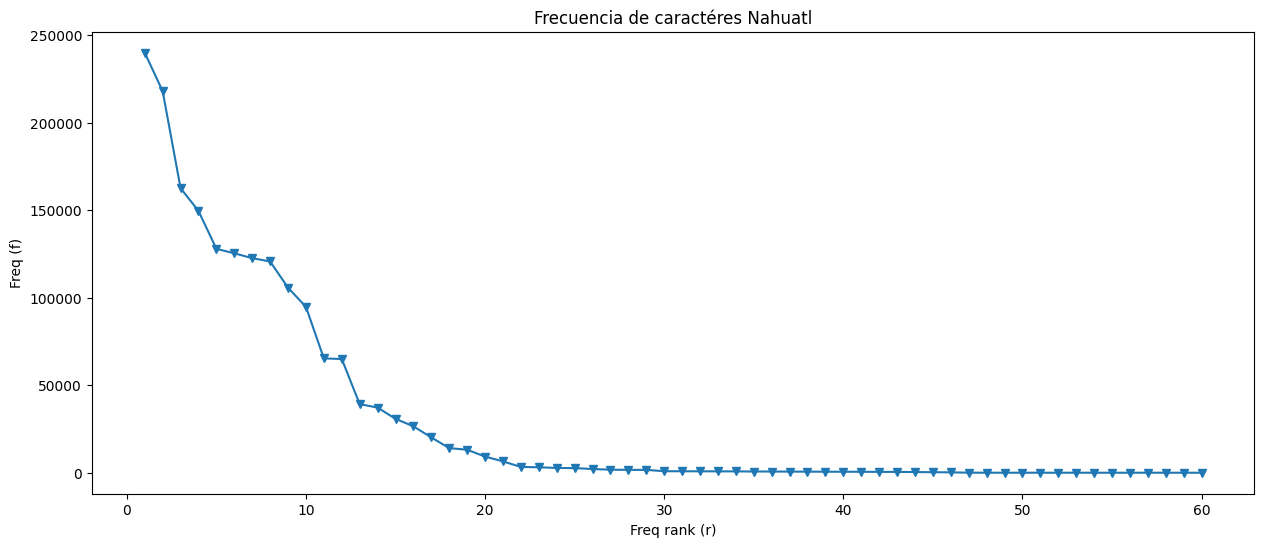

In [14]:
most_common_count_chars = 100
frequencies = get_frequencies(nahuatl_chars, most_common_count_chars)
plot_frequencies(frequencies,"Frecuencia de caractéres Nahuatl")

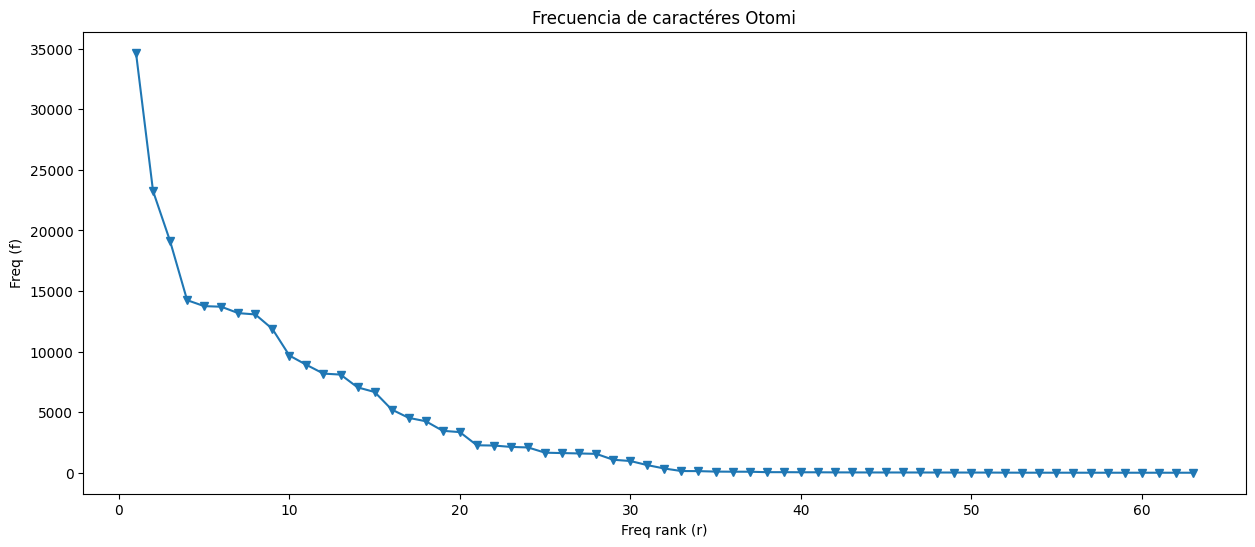

In [15]:
frequencies = get_frequencies(otomi_chars, most_common_count_chars)
plot_frequencies(frequencies,"Frecuencia de caractéres Otomi")

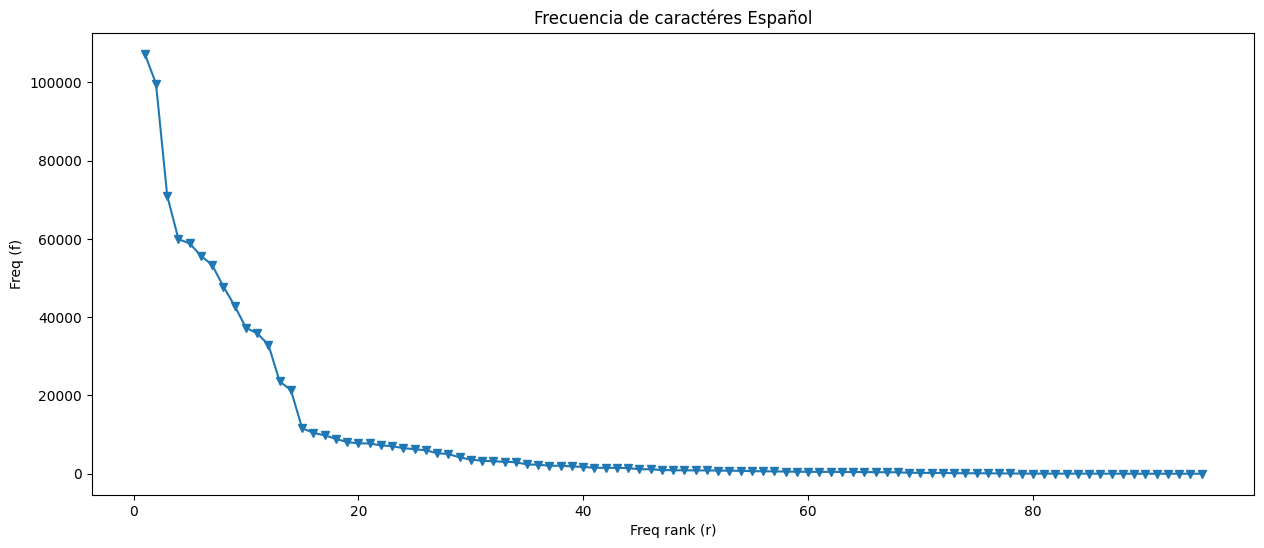

In [16]:
frequencies = get_frequencies(spa_chars, most_common_count_chars)
plot_frequencies(frequencies,"Frecuencia de caractéres Español")

## 3. n-gramas

In [17]:
eng_gram = Counter(normalize_strings(generate_ngrams(brown.sents(), n=2)))
spa_gram = Counter(normalize_strings(generate_ngrams(cess.sents(), n=2)))
nahuatl_gram = Counter(normalize_strings(generate_ngrams_simple_list(nahuatl_words)))
otomi_gram = Counter(normalize_strings(generate_ngrams_simple_list(otomi_words)))

In [18]:
nahuatl_gram.most_common(10)

[('tl', 53811),
 ('an', 50850),
 ('ca', 44109),
 ('ui', 41846),
 ('hu', 39456),
 ('qu', 39140),
 ('in', 38382),
 ('ua', 36644),
 ('la', 34170),
 ('ic', 28553)]

In [19]:
otomi_gram.most_common(10)

[('ra', 6668),
 ('ya', 5291),
 ('a', 5080),
 ('bi', 3620),
 ('ts', 3493),
 ('ma', 3141),
 ('nu', 3128),
 ('di', 2789),
 ('e', 2770),
 ('da', 2727)]

In [20]:
spa_gram.most_common(10)

[('de', 21237),
 ('en', 18440),
 ('es', 16502),
 ('la', 13499),
 ('on', 13253),
 ('os', 12918),
 ('er', 12113),
 ('ra', 11707),
 ('el', 11637),
 ('an', 11126)]

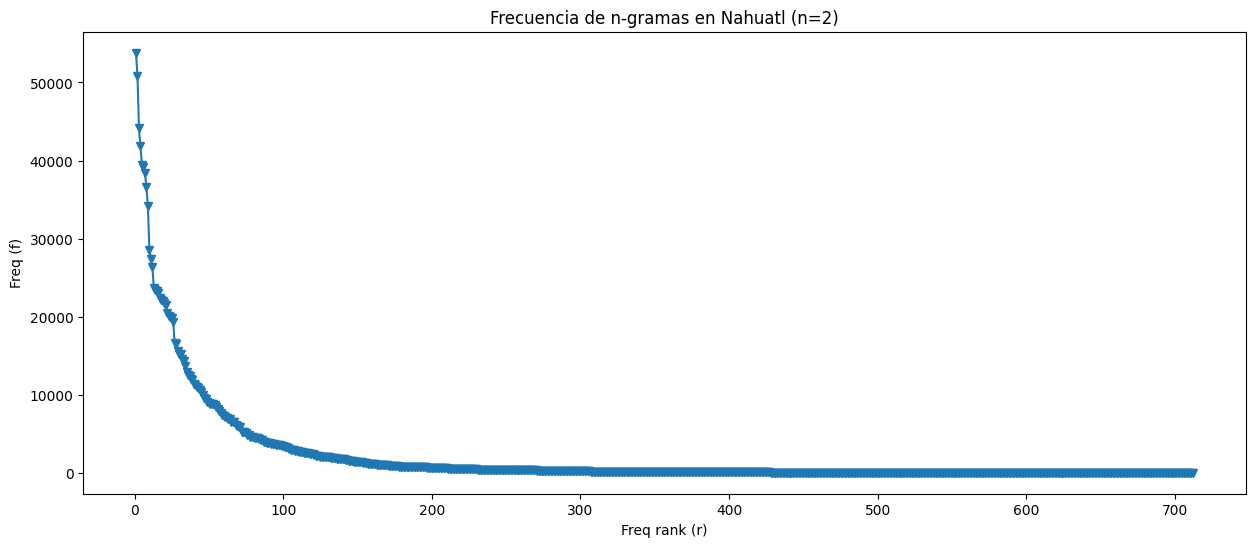

In [21]:
frequencies = get_frequencies(nahuatl_gram, 1000)
plot_frequencies(frequencies,"Frecuencia de n-gramas en Nahuatl (n=2)")

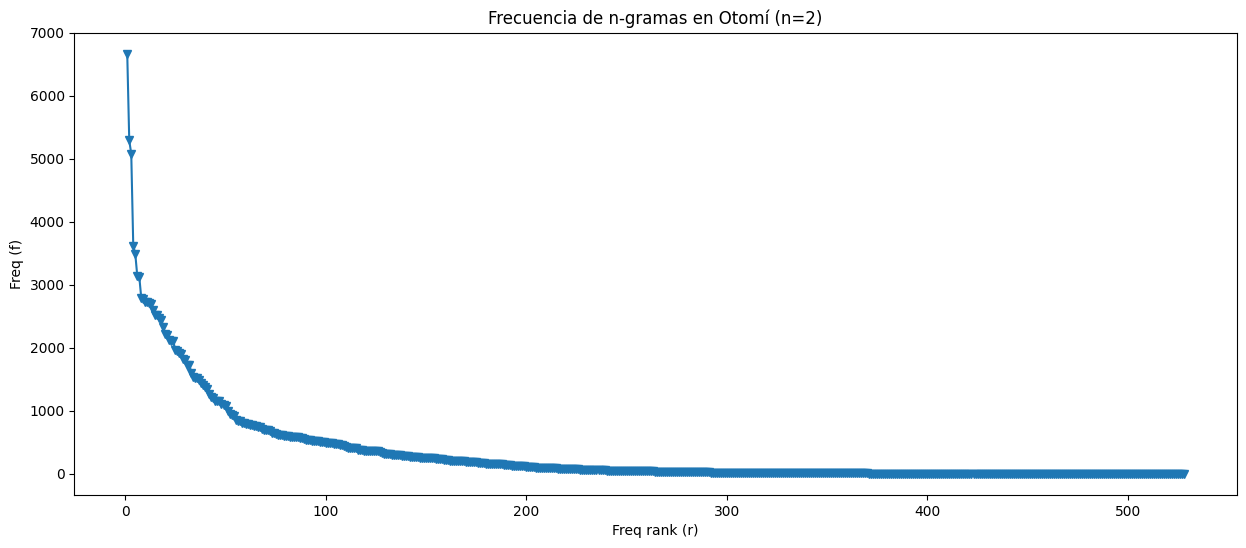

In [22]:
frequencies = get_frequencies(otomi_gram, 1000)
plot_frequencies(frequencies,"Frecuencia de n-gramas en Otomí (n=2)")

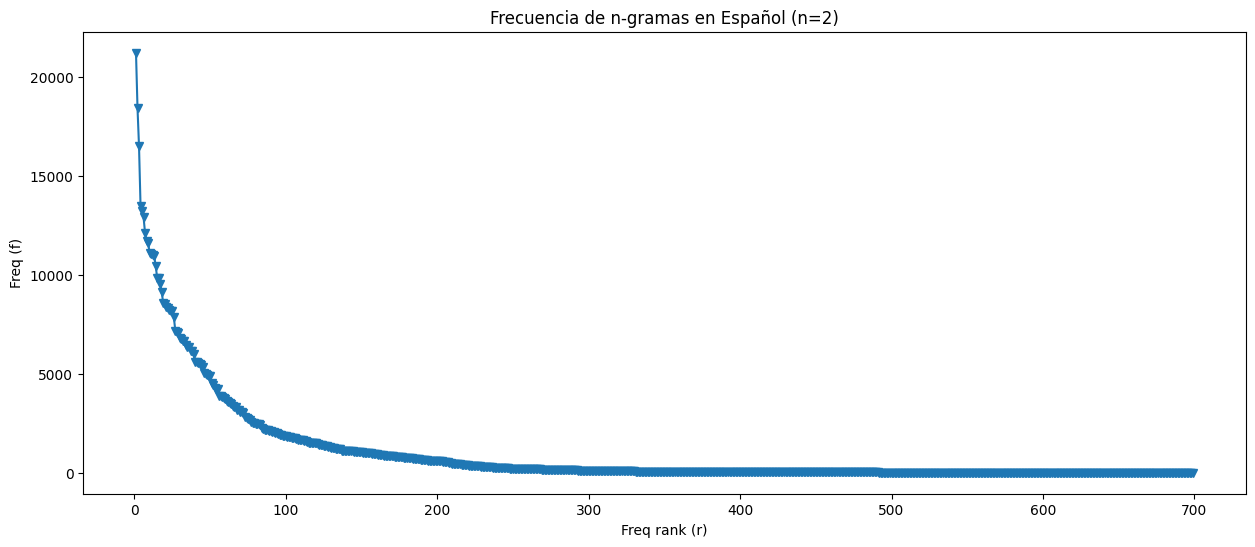

In [23]:
frequencies = get_frequencies(spa_gram, 1000)
plot_frequencies(frequencies,"Frecuencia de n-gramas en Español (n=2)")

## 4. stopwords

In [24]:
stopwords_eng = stopwords.words('english')

In [25]:
len(stopwords_eng)

179

In [26]:
stopwords_eng[1:10]

['me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [27]:
generated_stopwords = Counter( normalize_strings(brown.words()) ).most_common(len(stopwords_eng))
generated_stopword_list = [t[0] for t in generated_stopwords]
sorted(generated_stopword_list)[1:10]

['a', 'about', 'af', 'after', 'again', 'against', 'all', 'also', 'american']

### Nube de Stopwords de NLTK

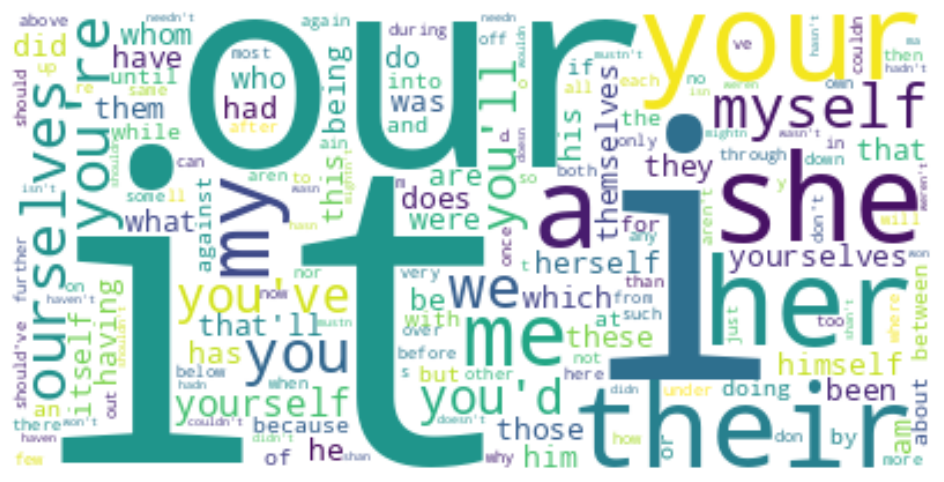

In [28]:
word_cloud = WordCloud(collocations = True, background_color = 'white', include_numbers = False, stopwords = [""]).generate(" ".join(stopwords_eng))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Nube de Stopwords generadas con Zipf

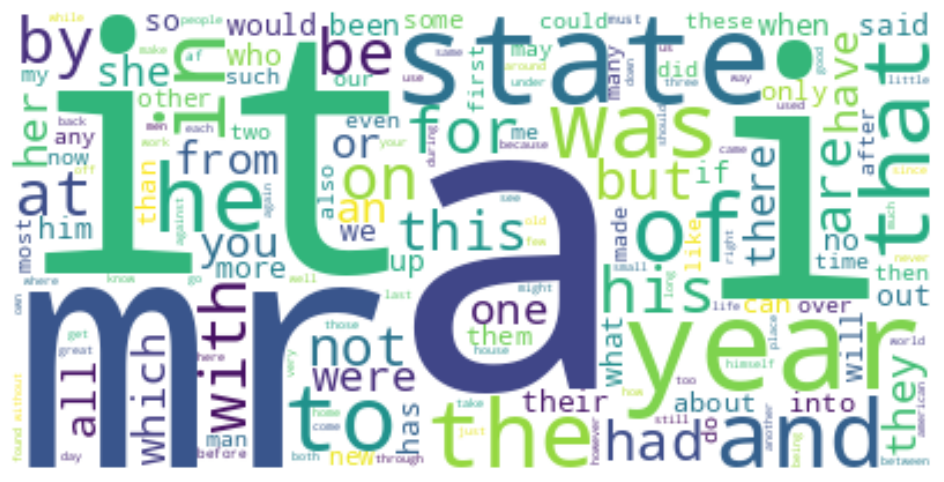

In [29]:
generated_word_cloud = WordCloud(collocations = True, background_color = 'white', include_numbers = False, stopwords = [""]).generate(" ".join(generated_stopword_list))
plt.imshow(generated_word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### ¿Obtenemos el mismo resultado? Si o no y ¿Porqué?

No, en nuestras stopwords generadas vía Zipf existen palabras que a pesar de ser muy comunes sí agregan información, tal es el caso de 'state', 'year, 'first', 'people', en cambio, otras palabras que carecen de sentido por sí mismas o que agregan poca o nula información no aparecen en sus variantes menos comunes como 'mightn', "mightn't"